<a href="https://colab.research.google.com/github/cadred000/MAT421/blob/main/Module_B_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dan Gibson - Module B Homework

## Interpolation Problem Statement

Interpolation is a process where a function can be found that will allow the user to find an unknown dependent variable based on some data set.  This process does not require an existing model to be used.  Such a function is written as- $$\hat y (x_i) = y_i$$

## Linear Interpolation

As the name suggests, linear interpolation assumes the estimated point lines on a straight line between two consecutive data points. First, we will manually linearly interpolate the function then we will use the Scipy function.

In [ ]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-poster')

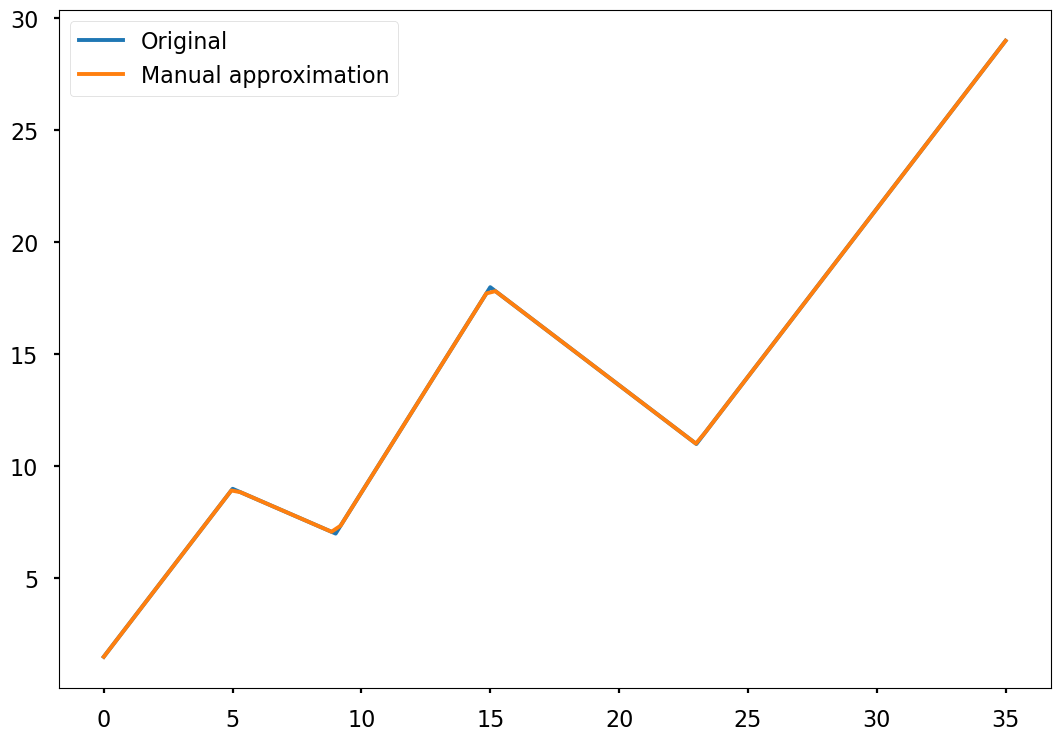

In [ ]:
x = [0,5,9,15,23,35]
y = [1.5,9,7,18,11,29]
x_2 = np.linspace(0,35,100)

# this is the manual version of the scipy interpolation function

def manual_approx(x,y,X):
    Y = np.zeros(len(X))
    for i in range(len(X)):
        low_ind = np.max(np.where(x <= X[i])[0])
        if x[low_ind] == X[i]:
            Y[i] = y[low_ind]
        else:
            up_ind = np.min(np.where(x >= X[i])[0])
            x1, x2 = x[low_ind], x[up_ind]
            y1, y2 = y[low_ind], y[up_ind]
            Y[i] = y1 + (y2 - y1) * (X[i] - x1) / (x2 - x1)
    return Y

plt.plot(x,y, label="Original")
plt.plot(x_2, manual_approx(x,y,x_2), label='Manual approximation')
plt.legend()
plt.show()


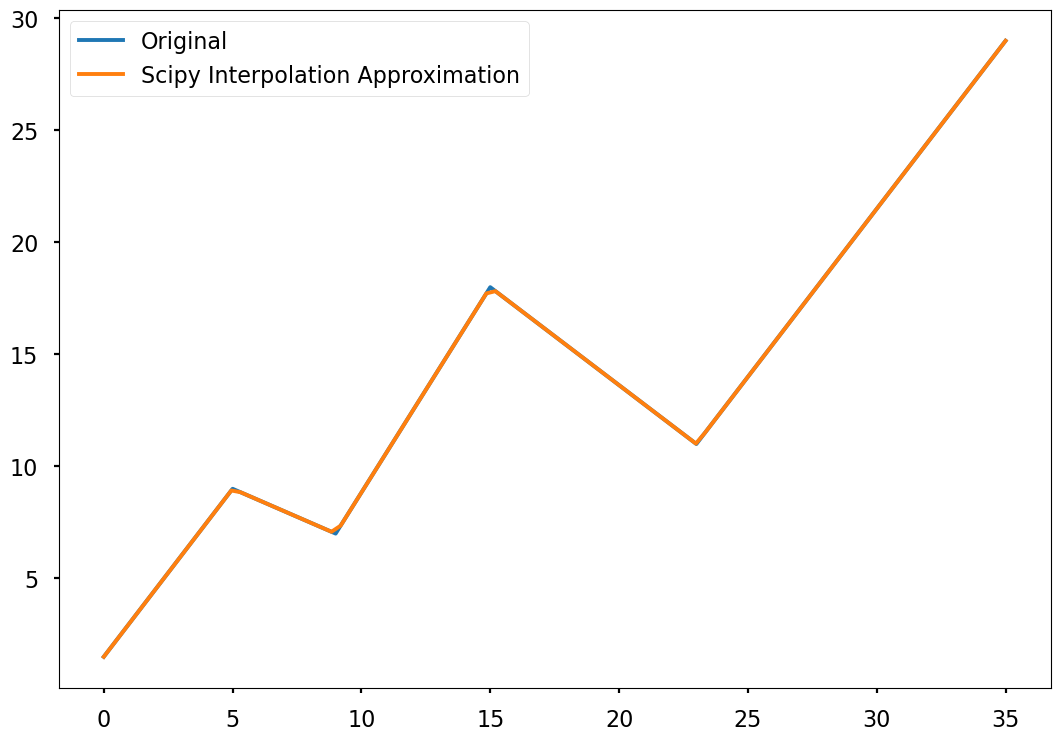

In [ ]:
# Scipy interpolation function

plt.plot(x,y,label='Original')
interpolation = interp1d(x,y)
plt.plot(x_2, interpolation(x_2), label='Scipy Interpolation Approximation')
plt.legend()
plt.show()

## Cubic Spline Interpolation

The next plot explores some of the different boundary condition types offered with the CubicSpline function.  As shown, the 'clamped' type seems to fit this data the best.  It applies the condition that the first derivative at the curve's ends are zero.

In [ ]:
from scipy.interpolate import CubicSpline

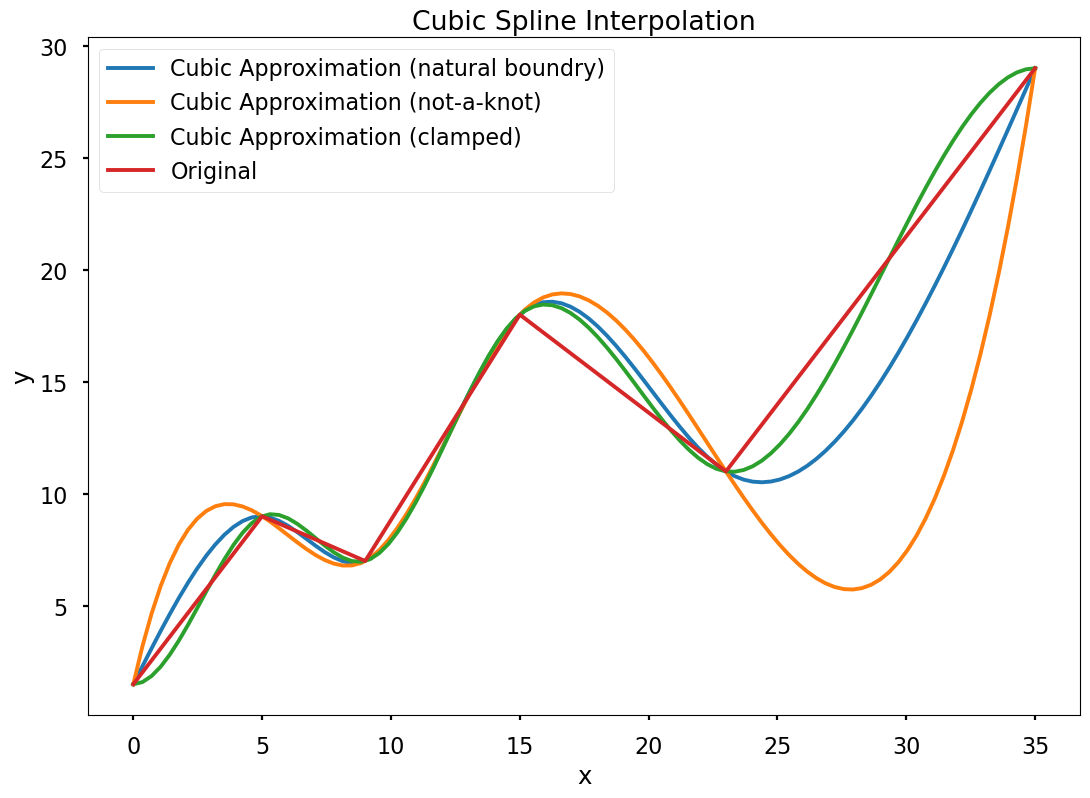

In [ ]:
f = CubicSpline(x, y, bc_type = 'natural')
g = CubicSpline(x, y)
h = CubicSpline(x, y, bc_type = 'clamped')
x_new = np.linspace(0, 35, 100)
y_1 = f(x_new)
y_2 = g(x_new)
y_3 = h(x_new)

plt.plot(x_new, y_1, label='Cubic Approximation (natural boundry)')
plt.plot(x_new, y_2, label='Cubic Approximation (not-a-knot)')
plt.plot(x_new, y_3, label='Cubic Approximation (clamped)')
plt.plot(x, y, label='Original')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()